# Author

Prof. Dr. Carlos Forster (ITA Professor)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

import string
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
from nlp_tir import setup
setup.nltk_download_packages()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lerax/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/lerax/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package omw to /home/lerax/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package punkt to /home/lerax/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lerax/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to /home/lerax/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package treebank to /home/lerax/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lerax/nltk_data..

Categories: ['neg', 'pos']
Sizes: [32025, 33233]


([<matplotlib.patches.Wedge at 0x7fec9af2b350>,
 [Text(-1.0995350170027227, 0.03198040626418625, 'neg'),
  Text(1.0995350199969396, -0.03198030331828838, 'pos')],
 [Text(-0.599746372910576, 0.01744385796228341, '49.1%'),
  Text(0.5997463745437852, -0.017443801809975477, '50.9%')])

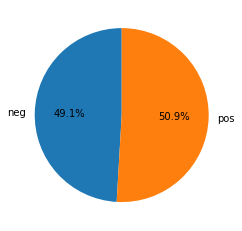

In [ ]:
from nltk.corpus import movie_reviews

categ= movie_reviews.categories()
sizes= [len(movie_reviews.sents(categories=x)) for x in categ]

print( 'Categories:',categ)
print('Sizes:',sizes)

fig,ax=plt.subplots()
ax.pie(sizes, labels=categ, autopct="%.1f%%", startangle=90)

In [ ]:
#print(movie_reviews.fileids())

#print(movie_reviews.readme())

print(movie_reviews.words())

#print(movie_reviews.paras())

#print("\n<p>\n".join(["\n".join(" ".join(y) for y in x) for x in movie_reviews.paras()[0:10]]))

#print("\n<br>".join([" ".join(x) for y in movie_reviews.paras()[0:20] for x in y ]))

#print(movie_reviews.sents())

#print("\n".join([" ".join(x) for x in movie_reviews.sents(categories=['neg'])[0:20]]))



['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]


In [ ]:
from nltk.tokenize import *
word_tokenize("I shot myself on the foot. It didn't hurt however.")

['I',
 'shot',
 'myself',
 'on',
 'the',
 'foot',
 '.',
 'It',
 'did',
 "n't",
 'hurt',
 'however',
 '.']

In [ ]:
sent_tokenize("I shot myself on the foot. It didn't hurt however.")

['I shot myself on the foot.', "It didn't hurt however."]

<FreqDist with 28480 samples and 751256 outcomes>
[(',', 35269), ('the', 35058), ('.', 32162), ('a', 17910), ('and', 15680), ('of', 15487), ('to', 15420), ("'", 15317), ('is', 11136), ('in', 10097)]


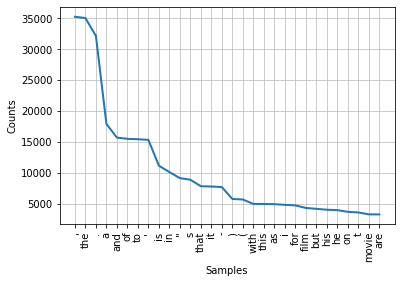

In [ ]:
from nltk.probability import FreqDist

fdist=FreqDist(movie_reviews.words(categories=['neg']))
print(fdist)
# fdist.pprint()
print(fdist.most_common(10))
fdist.plot(30,cumulative=False)

In [ ]:
from nltk.corpus import stopwords

stopw=set(stopwords.words("english"))
print(stopw)

{'own', 'myself', 'all', 'it', 'to', 'out', 'how', 'we', 'her', 'itself', 'over', 'do', 'what', 'while', 'yours', 'him', 'no', 'nor', 'too', 'herself', 'your', 'theirs', 'below', 'down', "doesn't", 'if', 'me', 'from', 'most', 'which', 'under', "didn't", 'such', "aren't", 'very', 'i', 'you', 'why', 'our', 'then', 'hasn', 'ain', "isn't", 'during', 'above', 'about', 'needn', 'they', 'she', 'himself', 'being', "wouldn't", 'there', "hasn't", 'a', 'only', "needn't", 'whom', 'having', 'here', 'each', 'y', 'are', 'haven', 'he', 'ours', 'their', 'isn', 'its', 'shouldn', "that'll", 'those', 'be', "shouldn't", 'until', 'shan', 'ma', 'more', 'just', 'won', 'weren', 'on', "it's", 'by', 'who', 'hers', 'hadn', "won't", 'this', 'couldn', 'off', 'his', 've', 'into', "mightn't", 'and', 'these', 'don', 'doesn', 'wasn', 'was', 'with', 'o', "weren't", "wasn't", 'before', "she's", 'after', 'mightn', 'had', 'other', 'were', 'does', 'aren', "couldn't", 'yourself', 'at', 'have', 'should', 'been', 'further', "d

In [ ]:
wordlist=movie_reviews.words(categories=['neg'])

wordlistfiltered=[]
for w in wordlist:
  if w not in stopw:
    if w not in string.punctuation:
      wordlistfiltered.append(w)

print(wordlistfiltered[0:1000])

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mind', 'fuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions', 'disappearances', 'looooot', 'chase', 'scenes', 'tons', 'weird', '

In [ ]:
from nltk.stem import PorterStemmer

ps=PorterStemmer()

wordliststemmed=[ps.stem(w) for w in wordlistfiltered]
print(wordliststemmed[0:1000])


['plot', 'two', 'teen', 'coupl', 'go', 'church', 'parti', 'drink', 'drive', 'get', 'accid', 'one', 'guy', 'die', 'girlfriend', 'continu', 'see', 'life', 'nightmar', 'deal', 'watch', 'movi', 'sorta', 'find', 'critiqu', 'mind', 'fuck', 'movi', 'teen', 'gener', 'touch', 'cool', 'idea', 'present', 'bad', 'packag', 'make', 'review', 'even', 'harder', 'one', 'write', 'sinc', 'gener', 'applaud', 'film', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'way', 'make', 'type', 'film', 'folk', 'snag', 'one', 'correctli', 'seem', 'taken', 'pretti', 'neat', 'concept', 'execut', 'terribl', 'problem', 'movi', 'well', 'main', 'problem', 'simpli', 'jumbl', 'start', 'normal', 'downshift', 'fantasi', 'world', 'audienc', 'member', 'idea', 'go', 'dream', 'charact', 'come', 'back', 'dead', 'other', 'look', 'like', 'dead', 'strang', 'apparit', 'disappear', 'looooot', 'chase', 'scene', 'ton', 'weird', 'thing', 'happen', 'simpli', 'explain', 'person', 'mind', 'tri', 'unr

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer as wnl

nltk.download('omw-1.4')

lem=wnl()
lem.lemmatize('drooling','v')
wordlistlem=[lem.lemmatize(w) for w in wordlistfiltered]
print(wordlistlem[0:1000])

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['plot', 'two', 'teen', 'couple', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guy', 'dy', 'girlfriend', 'continues', 'see', 'life', 'nightmare', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mind', 'fuck', 'movie', 'teen', 'generation', 'touch', 'cool', 'idea', 'present', 'bad', 'package', 'make', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'film', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'way', 'making', 'type', 'film', 'folk', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problem', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'start', 'normal', 'downshift', 'fantasy', 'world', 'audience', 'member', 'idea', 'going', 'dream', 'character', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparition', 'disappearance', 'looooot', 'chase', 'scene', 'ton', 'weird', 'thing', 'happen', 'simp

[('film', 4939), ('movie', 3817), ('one', 2873), ('like', 1941), ('character', 1815), ('get', 1494), ('time', 1415), ('even', 1388), ('scene', 1306), ('make', 1282)]


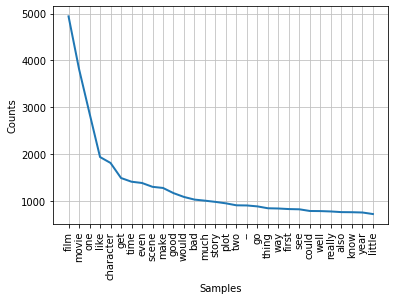

In [ ]:
fdist=FreqDist(wordlistlem)
print(fdist.most_common(10))
fdist.plot(30,cumulative=False)

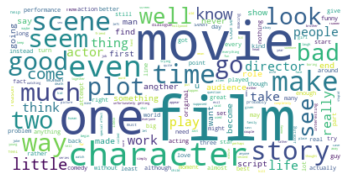

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(background_color="white").generate(" ".join(wordlistlem))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
postags=nltk.pos_tag(wordlist)

print('Parts of speech:', postags[0:1000] )


Parts of speech: [('plot', 'NN'), (':', ':'), ('two', 'CD'), ('teen', 'NN'), ('couples', 'NNS'), ('go', 'VBP'), ('to', 'TO'), ('a', 'DT'), ('church', 'NN'), ('party', 'NN'), (',', ','), ('drink', 'NN'), ('and', 'CC'), ('then', 'RB'), ('drive', 'NN'), ('.', '.'), ('they', 'PRP'), ('get', 'VBP'), ('into', 'IN'), ('an', 'DT'), ('accident', 'NN'), ('.', '.'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('guys', 'NN'), ('dies', 'VBZ'), (',', ','), ('but', 'CC'), ('his', 'PRP$'), ('girlfriend', 'NN'), ('continues', 'VBZ'), ('to', 'TO'), ('see', 'VB'), ('him', 'PRP'), ('in', 'IN'), ('her', 'PRP$'), ('life', 'NN'), (',', ','), ('and', 'CC'), ('has', 'VBZ'), ('nightmares', 'NNS'), ('.', '.'), ('what', 'WP'), ("'", "''"), ('s', 'VBD'), ('the', 'DT'), ('deal', 'NN'), ('?', '.'), ('watch', 'VB'), ('the', 'DT'), ('movie', 'NN'), ('and', 'CC'), ('"', 'NNP'), ('sorta', 'VBP'), ('"', 'NNP'), ('find', 'VBP'), ('out', 'RP'), ('.', '.'), ('.', '.'), ('.', '.'), ('critique', 'NN'), (':', ':'), ('a', 'DT')

In [ ]:
nltk.pos_tag(['I','can', 'drink', 'a', 'can', 'of', 'beer', '.'])


[('I', 'PRP'),
 ('can', 'MD'),
 ('drink', 'VB'),
 ('a', 'DT'),
 ('can', 'MD'),
 ('of', 'IN'),
 ('beer', 'NN'),
 ('.', '.')]

    CC coordinating conjunction
    CD cardinal digit
    DT determiner
    EX existential there (like: “there is” … think of it like “there exists”)
    FW foreign word
    IN preposition/subordinating conjunction
    JJ adjective ‘big’
    JJR adjective, comparative ‘bigger’
    JJS adjective, superlative ‘biggest’
    LS list marker 1)
    MD modal could, will
    NN noun, singular ‘desk’
    NNS noun plural ‘desks’
    NNP proper noun, singular ‘Harrison’
    NNPS proper noun, plural ‘Americans’
    PDT predeterminer ‘all the kids’
    POS possessive ending parent’s
    PRP personal pronoun I, he, she
    PRP$ possessive pronoun my, his, hers
    
    RB adverb very, silently,
    RBR adverb, comparative better
    RBS adverb, superlative best
    RP particle give up
    TO, to go ‘to’ the store.
    UH interjection, errrrrrrrm
    VB verb, base form take
    VBD verb, past tense took
    VBG verb, gerund/present participle taking
    VBN verb, past participle taken
    VBP verb, sing. present, non-3d take
    VBZ verb, 3rd person sing. present takes
    WDT wh-determiner which
    WP wh-pronoun who, what
    WP$ possessive wh-pronoun whose
    WRB wh-abverb where, when

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics

from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as FLDA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [ ]:
negdata=[" ".join(x) for x in movie_reviews.sents(categories=['neg'])]
negsize=len(negdata)
posdata=[" ".join(x) for x in movie_reviews.sents(categories=['pos'])]
possize=len(posdata)

cv=CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1))

X=cv.fit_transform(negdata+posdata)
y=[-1]*negsize+[1]*possize


In [ ]:
negdata[0:10]

['plot : two teen couples go to a church party , drink and then drive .',
 'they get into an accident .',
 'one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .',
 "what ' s the deal ?",
 'watch the movie and " sorta " find out .',
 '. . critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package .',
 "which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn ' t snag this one correctly .",
 'they seem to have taken this pretty neat concept , but executed it terribly .',
 'so what are the problems with the movie ?',
 "well , its main problem is that it ' s simply too jumbled ."]

In [ ]:
posdata[0:10]

["films adapted from comic books have had plenty of success , whether they ' re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there ' s never really been a comic book like from hell before .",
 "for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid ' 80s with a 12 - part series called the watchmen .",
 'to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd .',
 'the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes .',
 "in other words , don ' t dismiss this film because of its source .",
 "if you can get past the whole comic book thing , you might find another stumbling block in from hell ' s directors , albert and allen hughes .",
 "getting the hughes brothers 

In [ ]:
print(cv.get_feature_names()[0:100])

['00', '000', '0009f', '007', '00s', '03', '04', '05', '05425', '10', '100', '1000', '10000', '100m', '101', '102', '103', '104', '105', '106', '107', '108', '109', '10b', '10s', '10th', '11', '110', '111', '112', '113', '1138', '114', '115', '117', '118', '11th', '12', '121', '122', '123', '125', '126', '127', '1272', '128', '129', '1298', '12th', '13', '130', '1305', '131', '132', '133', '135', '137', '138', '139', '13th', '14', '140', '1400', '143', '144', '14th', '15', '150', '1500s', '150th', '151', '152', '1521', '153', '155', '1554', '157', '1583', '1590', '15th', '16', '160', '1600', '1600s', '161', '165', '167', '1692', '16mm', '16th', '16x9', '17', '170', '1700s', '1709', '172', '175', '1773', '1791', '1792']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X=cv.fit_transform(negdata+posdata)
y=[-1]*negsize+[1]*possize


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)

cf=MultinomialNB().fit(X_train,y_train)
predicted=cf.predict(X_test)
metrics.accuracy_score(y_test,predicted)


0.6934314025947492

In [ ]:
tf=TfidfVectorizer()

X=tf.fit_transform(negdata+posdata)
y=[-1]*negsize+[1]*possize

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)

cf=MultinomialNB().fit(X_train,y_train)
predicted=cf.predict(X_test)
metrics.accuracy_score(y_test,predicted)


0.6987945653284299

In [ ]:
clf=LogisticRegression(penalty='l2',solver='saga',max_iter=200, C=4.0)


cf=clf.fit(X_train,y_train)
predicted=cf.predict(X_test)
predicted=[-1 if x<0 else 1 for x in predicted]
metrics.accuracy_score(y_test,predicted)


0.69481050158341

In [ ]:
clf=LogisticRegression(penalty='l1',solver='liblinear',max_iter=200, C=3.0)


cf=clf.fit(X_train,y_train)
predicted=cf.predict(X_test)
predicted=[-1 if x<0 else 1 for x in predicted]
print(metrics.accuracy_score(y_test,predicted))
#print(np.nonzero(clf.coef_))
selected_words = list(zip(clf.coef_.flatten(),cv.get_feature_names_out()))
selected_words.sort()
print('negative coefficient words:')
print(", ".join( x[1] for x in selected_words[0:300]))
print('---')
print('positive coefficient words:')
print(", ".join(x[1] for x in selected_words[-300:]))


0.6905199713964654
negative coefficient words:
neuve, jerking, sputtering, seniors, widening, mandible, brightly, margulies, bios, kasalivich, awaits, worker, clarification, celebrities, lasts, emissary, icy, amazing, mconaughy, yuelin, mailing, arnez, matrons, moonshiner, bayou, scalvaging, satirizing, schreiber, joust, cremation, johto, solution, geisha, civilians, t2, mckee, garbed, swarthy, machete, sculpture, alexandre, cartridges, shriek, gimmick, jumped, price, clock, gutch, putrefaction, crucified, bruised, gordo, backs, fondled, role, indebted, kingsly, jimmies, hallstrom, favoring, whiny, reviewing, hired, narrate, ranges, huntingburg, henchmen, narrators, gps, whitechapel, numbered, originality, scent, props, cease, lapsed, sal, flashiness, supervising, blackboard, stress, channeled, sulka, pourkarim, plead, matt, squash, pen, hayley, pussyfoot, loudmouthed, makeovers, 8mm, brando, bustle, crappiness, unchained, borrowings, birds, fiddling, naville, edmonds, expectant, jr, g

In [ ]:
y_test[-1],(X_test[-1]>0),negdata[-1]

(-1, <1x39659 sparse matrix of type '<class 'numpy.bool_'>'
 	with 11 stored elements in Compressed Sparse Row format>, "after watching _a_night_at_the_roxbury_ , you ' ll be left with exactly the same .")